<a href="https://colab.research.google.com/github/AlvaroCastro22/SI-TF/blob/main/TFSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files


file_path = '/content/B. Generación Anual de residuos municipal_Distrital_2014_2021_0.csv' #ESTO VARIA POR COLAB
df = pd.read_csv(file_path, encoding='latin1', delimiter=';')

# Eliminar las columnas no útiles
columns_to_drop = [ 'N_SEC', 'DEPARTAMENTO', 'PROVINCIA', 'POB_RURAL', 'POB_TOTAL']
df_cleaned = df.drop(columns=columns_to_drop)

# Convertir la columna 'QRESIDUOS_MUN' a tipo numérico (reemplazar coma por punto)
df_cleaned['QRESIDUOS_MUN'] = df_cleaned['QRESIDUOS_MUN'].str.replace(',', '.').astype(float)

# Calcular el total de residuos por distrito y obtener el top 10
top_10_districts = df_cleaned.groupby('DISTRITO')['QRESIDUOS_MUN'].sum().nlargest(10)

# Filtrar el DataFrame original para obtener solo los distritos del top 10
df_top_10 = df_cleaned[df_cleaned['DISTRITO'].isin(top_10_districts.index)]

# Agrupar por distrito y año
df_grouped = df_top_10.groupby(['FECHA_CORTE','DISTRITO', 'PERIODO', 'UBIGEO', 'REG_NAT']).agg(
    {'POB_URBANA': 'first', 'QRESIDUOS_MUN': 'sum'}
).reset_index()

# Ordenar el DataFrame por distrito y año de manera descendente
df_grouped = df_grouped.sort_values(by=['FECHA_CORTE', 'PERIODO'], ascending=[True, False])

# Calcular la suma acumulativa por distrito
df_grouped['SUMA_TOTAL_DISTRITO'] = df_grouped.groupby('DISTRITO')['QRESIDUOS_MUN'].cumsum()

# Guardar el DataFrame procesado en un archivo CSV
df_grouped.to_csv('datos_procesados.csv', index=True)

# Descargar el archivo CSV
files.download('datos_procesados.csv')

# Mostrar los resultados
df_grouped.head(20)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,FECHA_CORTE,DISTRITO,PERIODO,UBIGEO,REG_NAT,POB_URBANA,QRESIDUOS_MUN,SUMA_TOTAL_DISTRITO
7,9/01/2023,ATE,2021,150103,COSTA,687615,247394.05,247394.05
15,9/01/2023,CALLAO,2021,70101,COSTA,520709,200919.29,200919.29
30,9/01/2023,COMAS,2021,120206,SIERRA,782,179.41,179.41
31,9/01/2023,COMAS,2021,150110,COSTA,581036,236315.64,236495.05
39,9/01/2023,LOS OLIVOS,2021,150117,COSTA,355528,124206.25,124206.25
47,9/01/2023,SAN JUAN DE LURIGANCHO,2021,150132,COSTA,1203125,382679.69,382679.69
55,9/01/2023,SAN JUAN DE MIRAFLORES,2021,150133,COSTA,417800,139425.83,139425.83
63,9/01/2023,SAN MARTIN DE PORRES,2021,150135,COSTA,758216,316284.39,316284.39
71,9/01/2023,SANTIAGO DE SURCO,2021,150140,COSTA,414142,140364.56,140364.56
79,9/01/2023,VILLA EL SALVADOR,2021,150142,COSTA,428276,149621.28,149621.28


   Unnamed: 0 FECHA_CORTE    DISTRITO  PERIODO  UBIGEO REG_NAT  POB_URBANA  \
0           7   9/01/2023         ATE     2021  150103   COSTA      687615   
1          15   9/01/2023      CALLAO     2021   70101   COSTA      520709   
2          30   9/01/2023       COMAS     2021  120206  SIERRA         782   
3          31   9/01/2023       COMAS     2021  150110   COSTA      581036   
4          39   9/01/2023  LOS OLIVOS     2021  150117   COSTA      355528   

   QRESIDUOS_MUN  SUMA_TOTAL_DISTRITO  
0      247394.05            247394.05  
1      200919.29            200919.29  
2         179.41               179.41  
3      236315.64            236495.05  
4      124206.25            124206.25  
Unnamed: 0             0
FECHA_CORTE            0
DISTRITO               0
PERIODO                0
UBIGEO                 0
REG_NAT                0
POB_URBANA             0
QRESIDUOS_MUN          0
SUMA_TOTAL_DISTRITO    0
dtype: int64


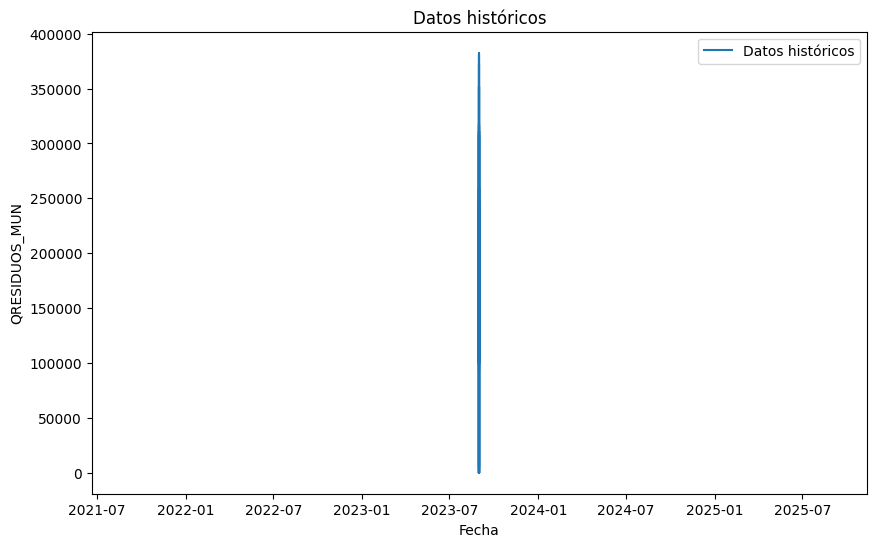

Error cuadrático medio (MSE): 6134138339.922734
Año: 2024, Pronóstico: 150173.11471428574
Año: 2025, Pronóstico: 150173.11471428574
Año: 2026, Pronóstico: 150173.11471428574
Año: 2027, Pronóstico: 150173.11471428574
Año: 2028, Pronóstico: 150173.11471428574


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


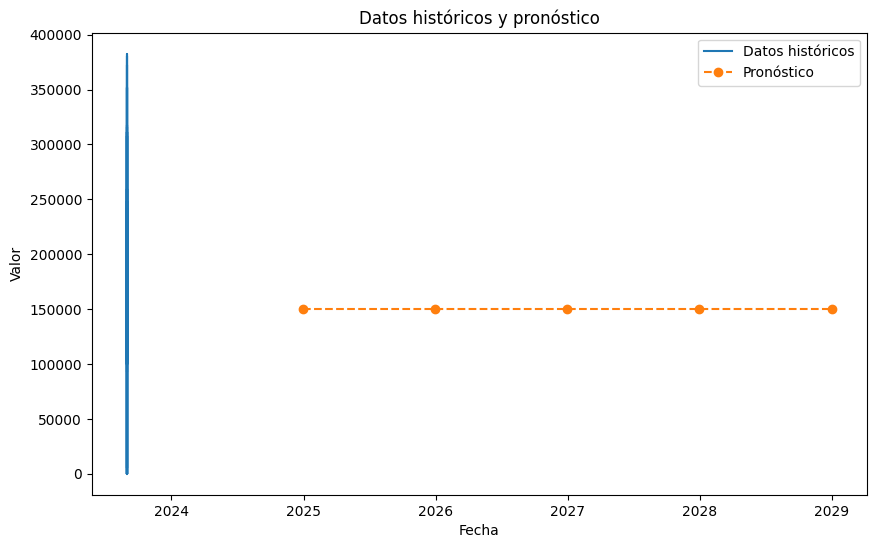

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cargar el archivo CSV
file_path = '/content/datos_procesados(1).csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame para revisar los datos
print(data.head())

# Asegurarse de que la columna de fechas sea de tipo datetime
data['FECHA_CORTE'] = pd.to_datetime(data['FECHA_CORTE'])

# Verificar si hay valores nulos
print(data.isnull().sum())

# Graficar los datos para tener una idea inicial
plt.figure(figsize=(10, 6))
plt.plot(data['FECHA_CORTE'], data['QRESIDUOS_MUN'], label='Datos históricos')
plt.xlabel('Fecha')
plt.ylabel('QRESIDUOS_MUN')
plt.title('Datos históricos')
plt.legend()
plt.show()

# Preparar los datos para la regresión lineal
data['Año'] = data['FECHA_CORTE'].dt.year
X = data[['Año']]
y = data['QRESIDUOS_MUN']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio (MSE): {mse}')

# Pronosticar los próximos 5 años
años_futuros = np.arange(data['Año'].max() + 1, data['Año'].max() + 6).reshape(-1, 1)
pronostico = model.predict(años_futuros)

# Mostrar el pronóstico
for año, valor in zip(años_futuros, pronostico):
    print(f'Año: {año[0]}, Pronóstico: {valor}')

# Graficar el pronóstico junto con los datos históricos
plt.figure(figsize=(10, 6))
plt.plot(data['FECHA_CORTE'], data['QRESIDUOS_MUN'], label='Datos históricos')
fechas_futuras = pd.date_range(start=f'{data["Año"].max() + 1}-01-01', periods=5, freq='Y')
plt.plot(fechas_futuras, pronostico, label='Pronóstico', linestyle='--', marker='o')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Datos históricos y pronóstico')
plt.legend()
plt.show()